<a href="https://colab.research.google.com/github/LeticiaPaesano/Analise-de-vendas-de-cafe/blob/main/Analise_Vendas_de_Cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VENDAS DE CAFÉ**

A análise a seguir tem como objetivo desvendar os padrões de consumo de café em uma máquina automatizada, considerando diversos aspectos como tipos de café, horários de pico, variações sazonais e valores de transação. A partir dos dados coletados, é possível identificar oportunidades de otimização e estratégias para aumentar as vendas.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar o dataset
uploaded = files.upload()
data = pd.read_csv('/content/venda-cafe.csv')

# Converter a coluna 'datetime' para o tipo datetime
data['datetime'] = pd.to_datetime(data['datetime'])

# Criar colunas auxiliares para análise
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek
data['month'] = data.datetime.dt.month

# Definir paleta de cores personalizada (tons de marrom)
custom_palette = ['#D2B48C', '#8B4513', '#A0522D']  # Marrom claro, marrom escuro, marrom intermediário

Saving venda-cafe.csv to venda-cafe (7).csv


<ipython-input-59-0e17c7ffdfe6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coffee_sales, x='coffee_name', y='money', palette=custom_palette)
<ipython-input-59-0e17c7ffdfe6>:6: UserWarning: 
The palette list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=coffee_sales, x='coffee_name', y='money', palette=custom_palette)


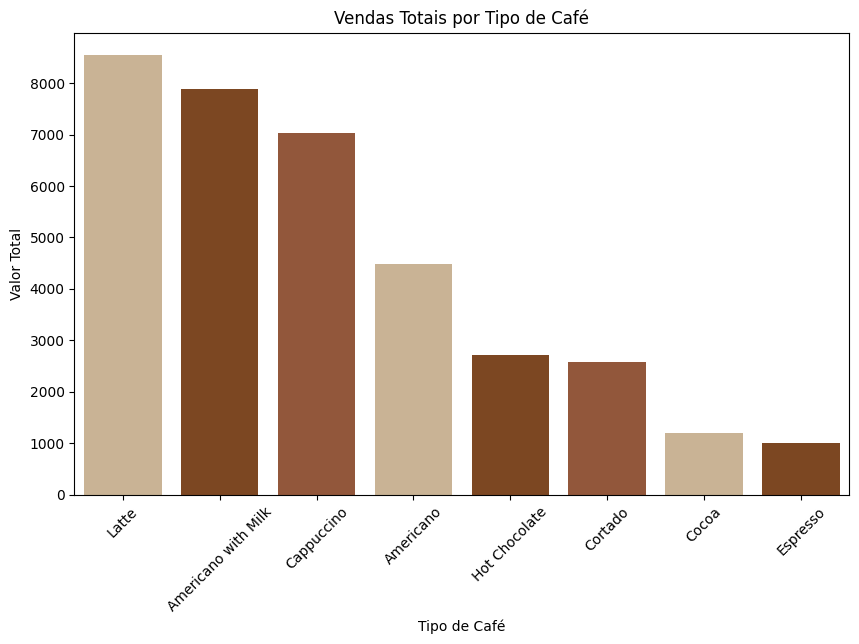

In [59]:
# Análise por tipo de café
coffee_sales = data.groupby('coffee_name')['money'].sum().reset_index()
coffee_sales = coffee_sales.sort_values(by='money', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coffee_sales, x='coffee_name', y='money', palette=custom_palette)
plt.title('Vendas Totais por Tipo de Café')
plt.xlabel('Tipo de Café')
plt.ylabel('Valor Total')
plt.xticks(rotation=45)
plt.show()


**Análise:**
**Dominância do Latte:** O Latte emerge como o produto líder, gerando uma receita significativamente maior em comparação aos demais tipos de café. Essa alta demanda indica uma preferência clara dos consumidores, que combina café espresso com leite vaporizado, resultando em um sabor suave e cremoso.

**Popularidade de Variedades com Leite:** Além do Latte, o Americano com Leite (Americano with milk) e o Cappuccino também se destacam no ranking de receitas. Essa tendência sugere que os consumidores apreciam bebidas com leite, que conferem um sabor mais suave e cremoso ao café.

**Nível de Aceitação de Outras Variedades:** Bebidas como Americano, Hot Chocolate e Cortado apresentam um desempenho consistente, indicando uma boa aceitação por parte dos clientes. No entanto, suas receitas são inferiores à do Latte.

**Baixa Demanda por Cocoa e Espresso:** Os tipos de café Cocoa e Espresso apresentam as menores receitas, sugerindo que a demanda por essas bebidas é menor em comparação com as outras opções. Isso pode ser devido a fatores como o paladar mais intenso do espresso ou a menor familiaridade dos consumidores com o cocoa.

<ipython-input-60-563ff2f29194>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekly_sales, x='day_of_week', y='money', palette=custom_palette)
<ipython-input-60-563ff2f29194>:4: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=weekly_sales, x='day_of_week', y='money', palette=custom_palette)


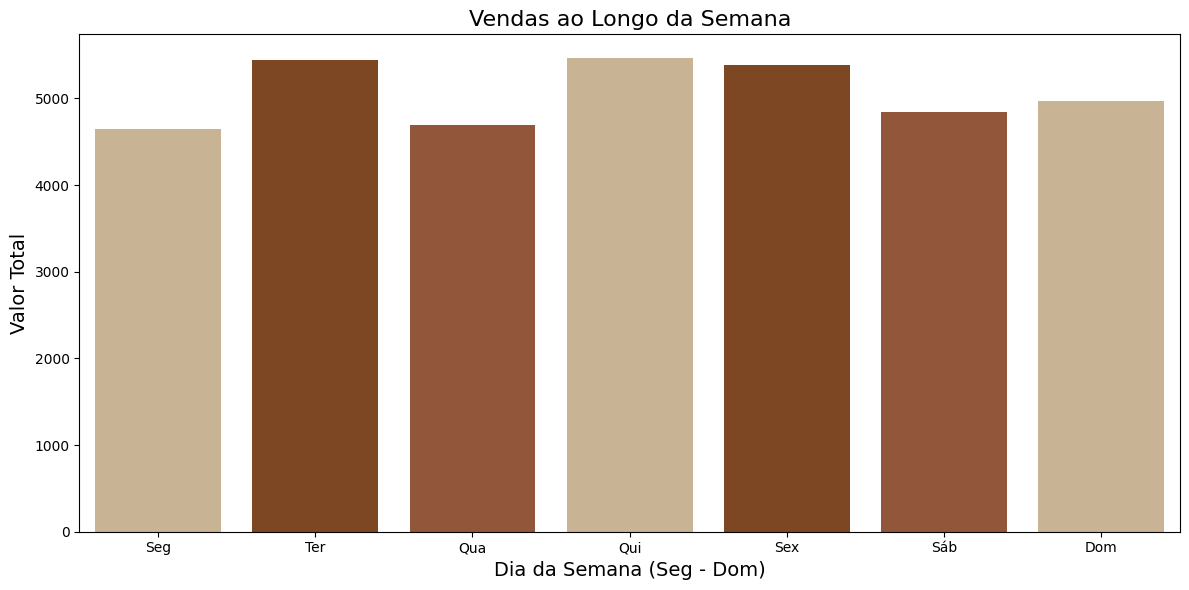

In [60]:
# Análise sobre o comportamento das vendas ao longo da semana
weekly_sales = data.groupby('day_of_week')['money'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_sales, x='day_of_week', y='money', palette=custom_palette)
plt.title('Vendas ao Longo da Semana', fontsize=16)
plt.xlabel('Dia da Semana (Seg - Dom)', fontsize=14)
plt.ylabel('Valor Total', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.tight_layout()
plt.show()

**Alta demanda nos dias úteis:** Observa-se um volume de vendas consistentemente maior nos dias de segunda a sexta-feira. Essa tendência é esperada, uma vez que a maior parte da população economicamente ativa frequenta estabelecimentos comerciais durante a semana.

**Queda nas vendas aos finais de semana:** Os dias de sábado e domingo apresentam um volume de vendas ligeiramente inferior aos dias úteis. Essa redução pode estar relacionada a diversos fatores, como menor fluxo de pessoas nos locais de trabalho e maior tempo livre para atividades fora de casa.

**Pequena variação entre os dias úteis:** Apesar da tendência de maior volume de vendas nos dias úteis, não há uma grande diferença entre os valores de segunda a sexta-feira. Isso indica que a demanda por café é relativamente estável durante a semana.

**Pequena variação entre sábado e domingo:** Os valores de venda no sábado e no domingo são semelhantes, sugerindo um padrão de consumo similar nos finais de semana.

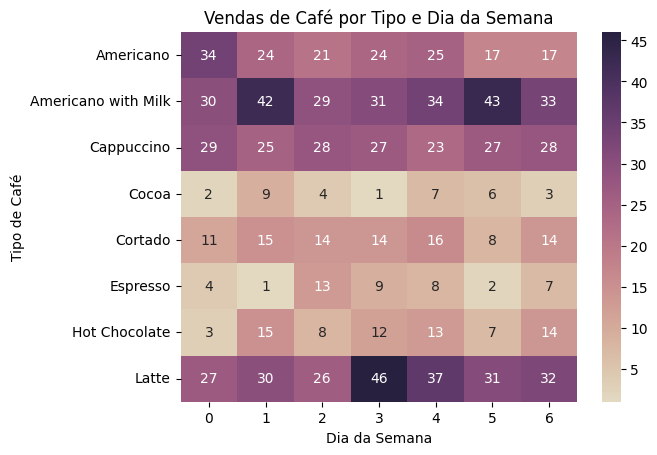

In [61]:
# Criando uma paleta de cores com tons de café
custom_palette = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

# Criando o gráfico de calor
sns.heatmap(pd.crosstab(data['coffee_name'], data['day_of_week']),
            annot=True, fmt='g', cmap=custom_palette)
plt.title('Vendas de Café por Tipo e Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Tipo de Café')
plt.show()

**Observações Principais:**

**Latte Dominante:** O Latte se destaca como o tipo de café mais popular em todos os dias da semana, com um pico de vendas no dia 3 (provavelmente uma quarta-feira). Isso indica uma preferência consistente dos clientes por essa bebida.

**Variação por Dia da Semana:** As vendas de café apresentam uma variação considerável ao longo da semana. Observa-se um aumento nas vendas nos dias úteis, com um pico geralmente no final da semana (dia 4 ou 5). Nos finais de semana (dias 6 e 7), as vendas tendem a ser menores.

**Popularidade de Variedades com Leite:** Além do Latte, o Americano com Leite e o Cappuccino também apresentam um bom desempenho, indicando uma preferência geral por bebidas com leite.

**Baixa Demanda por Cocoa e Espresso:** As bebidas Cocoa e Espresso apresentam as menores vendas, sugerindo que a demanda por essas opções é menor.

Picos e Vales: Existem picos de vendas em determinados dias para alguns tipos de café. Por exemplo, o Americano com Leite tem um pico no dia 4, enquanto o Cappuccino tem um pico no dia 7.

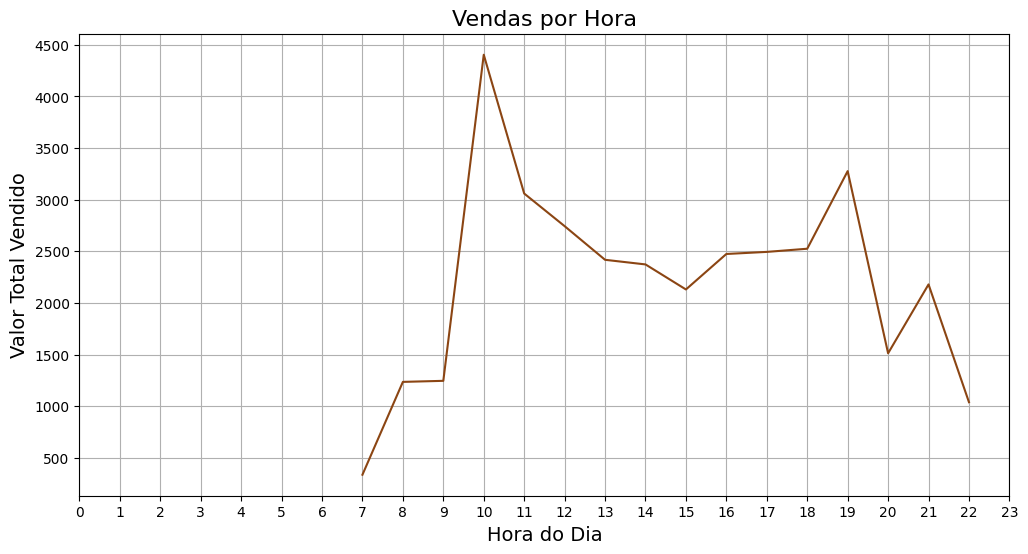

Os 3 horários de pico são:     hour    money
3     10  4403.78
12    19  3276.64
4     11  3059.78


In [62]:
# Agrupar os dados por hora e calcular a soma das vendas
hourly_sales = data.groupby('hour')['money'].sum().reset_index()

# Criar um gráfico de linha para visualizar os horários de pico
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='money', data=hourly_sales, color='#8B4513')  # Cor marrom escura
plt.title('Vendas por Hora', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Valor Total Vendido', fontsize=14)
plt.xticks(ticks=range(24))
plt.grid(True)
plt.show()

# Identificar os horários de pico (por exemplo, as 3 horas com maior venda)
top_hours = hourly_sales.sort_values(by='money', ascending=False).head(3)
print("Os 3 horários de pico são:", top_hours)

O gráfico mostra uma variação significativa nas vendas de café ao longo das horas do dia. Podemos observar alguns padrões interessantes:

# **Picos de Venda:**

  **Existem dois picos de venda bem definidos:** um pela manhã, por volta das 10h, e outro no final da tarde, por volta das 18h. Esses picos sugerem que os clientes tendem a comprar café durante os intervalos de trabalho e antes de retornarem para casa.

**Períodos de Baixa:** As horas mais calmas para as vendas são durante a madrugada e nas primeiras horas da manhã (entre 0h e 7h), além do período da tarde, entre 14h e 16h.

**Estabilidade:** Após o pico da tarde, as vendas tendem a diminuir gradativamente até o final do dia.

# **CONCLUSÃO**

Uma análise revela que a popularidade do Latte e de outras bebidas com leite, aliada aos picos de venda em horários específicos, oferece uma visão clara de como melhorar a oferta e adaptar estratégias de marketing. A estabilidade da demanda durante a semana, com uma redução nos finais da semana, sugere que promoções e ofertas específicas para esses períodos podem aumentar as vendas. Ao identificar esses padrões, é possível desenvolver campanhas direcionadas e ajustar o mix de produtos para maximizar as oportunidades de receita

